In [57]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [58]:
nPasos=3000
kT=1
N=100
J=1
B=0

In [59]:
def Estado(N):
    estado=np.zeros(N)
    for i in range(N):
        if np.random.random()<=0.5:
            estado[i]=1/2
        else:
            estado[i]=-1/2
    return estado

In [60]:
def EnergíaEstado(B,J,estado):
    Mb=9.274009994E-24
    energía=0
    for i in range(len(estado)-1):
        energía+=estado[i]*estado[i+1]
    energía*=-J
    for j in range(len(estado)):
        energía+=-Mb*(B*estado[j])
    magnetización=0
    for k in range(len(estado)):
        magnetización+=estado[k]
    return energía,magnetización

In [61]:
estado=Estado(10000)

In [62]:
EnergíaEstado(0,1,estado)

(-35.25, -59.0)

In [63]:
def IsingMetrópolis(kT,N,J,B,nPasos):
    estado_inicial=Estado(N)
    energías=[]
    estados=[estado_inicial.copy()]
    valorE,valorM=EnergíaEstado(B,J,estado_inicial.copy())
    magnetización=[]
    for k in range(nPasos-1):
        _,valorM=EnergíaEstado(B,J,estado_inicial.copy())
        magnetización.append(valorM)
        estado=estado_inicial.copy()
        iPart = np.random.randint(N)
        if np.random.random()<0.5:
            s=-1
            estado[iPart]*=s
            nueva_energía=EnergíaEstado(B,J,estado.copy())[0]
            dE=nueva_energía-valorE
        else:
            s=1
            estado[iPart]*=s
            nueva_energía=EnergíaEstado(B,J,estado.copy())[0]
            dE=nueva_energía-valorE
        
        if dE>0:
            if np.random.random() < np.exp(-dE/kT):
                estado_inicial[iPart]*=s
                valorE+=dE
            else:
                estado_inicial[iPart]*=1
                valorE+=0
        else:
            estado_inicial[iPart]*=s
            valorE+=dE
        estados.append(estado_inicial.copy())
        energías.append(EnergíaEstado(B,J,estado_inicial.copy())[0])
    return np.asarray(energías),np.asarray(estados),np.asarray(magnetización)

In [64]:
energías,estados,magnetización=IsingMetrópolis(kT,N,J,B,nPasos)

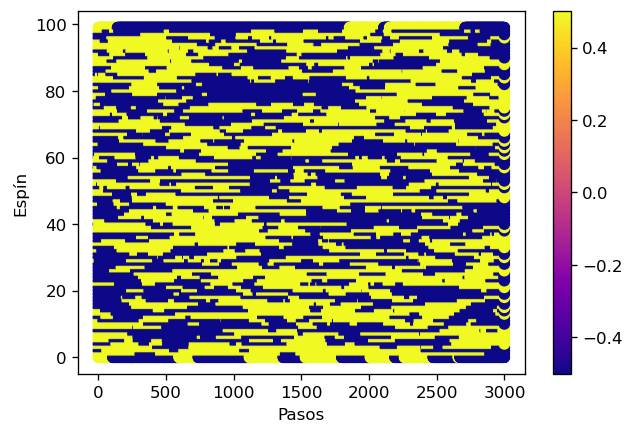

In [65]:
plt.figure(dpi=120)
X,T=np.meshgrid(np.arange(0,N),np.arange(0,nPasos))
plt.scatter(T,X,c=estados,cmap='plasma')
plt.ylabel('Espín')
plt.xlabel('Pasos')
plt.colorbar()
plt.show()

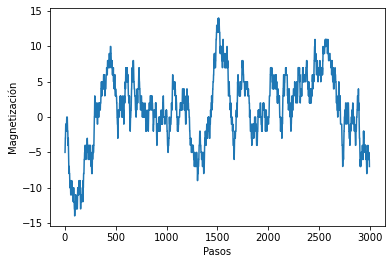

In [71]:
plt.plot(magnetización)
plt.xlabel('Pasos')
plt.ylabel('Magnetización')
plt.show()

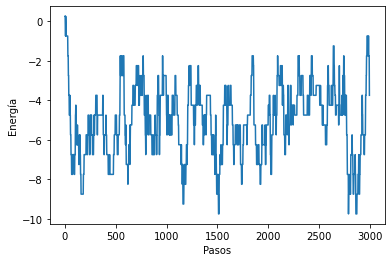

In [72]:
plt.plot(energías)
plt.xlabel('Pasos')
plt.ylabel('Energía')
plt.show()

In [67]:
def EnergíaTemperatura(kTf):
    energías=[]
    magnetizaciones=[]
    stdsEnergías=[]
    stdsMagnetizaciones=[]
    kT=np.arange(0.1,kTf,0.1)
    for ikT in kT:
        iEnergías,_,iMagnetizaciones=IsingMetrópolis(ikT,N,J,B,nPasos)
        energías.append(iEnergías.mean())
        stdsEnergías.append(iEnergías.std())
        magnetizaciones.append(iMagnetizaciones.mean())
        stdsMagnetizaciones.append(iMagnetizaciones.std())
    return kT,energías,stdsEnergías,magnetizaciones,stdsMagnetizaciones

In [68]:
kTs,energíaskT,stdsEnergías,magnetizacioneskT,stdsMagnetizaciones=EnergíaTemperatura(10)

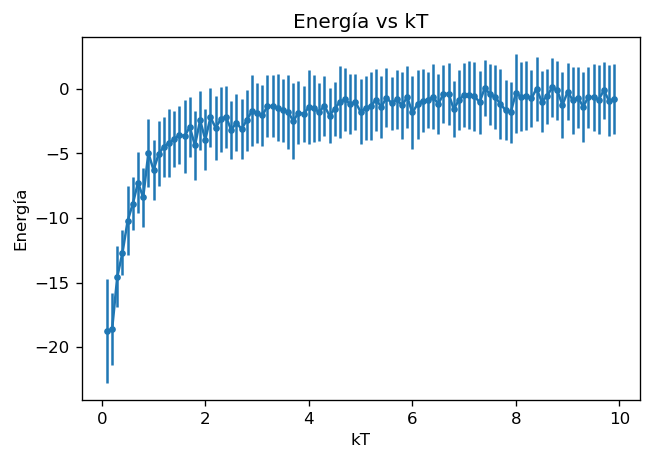

In [69]:
plt.figure(dpi=120)
plt.errorbar(kTs,energíaskT,yerr=stdsEnergías,marker='.')
plt.title('Energía vs kT')
plt.ylabel('Energía')
plt.xlabel('kT')
plt.show()

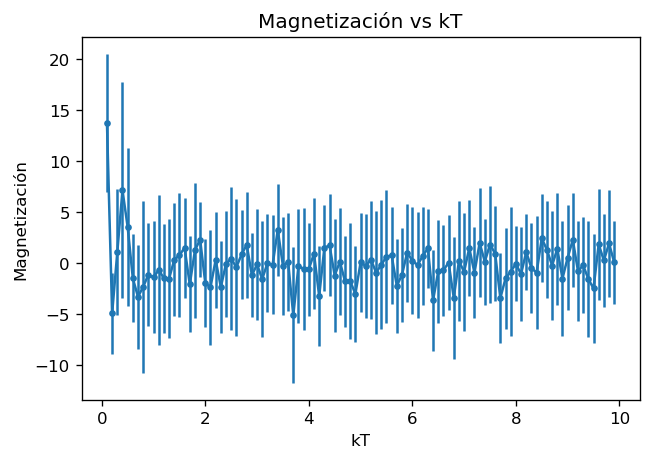

In [70]:
plt.figure(dpi=120)
plt.errorbar(kTs,magnetizacioneskT,yerr=stdsMagnetizaciones,marker='.')
plt.title('Magnetización vs kT')
plt.ylabel('Magnetización')
plt.xlabel('kT')
plt.show()